In [6]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [7]:
import os
import numpy as np

from pprint import pprint

import matplotlib
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc

matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'

rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'], 'monospace': ['Computer Modern Typewriter']})
rc('text', usetex=True)

from package.helpers import test_physical_lens
from package.plots import plot, diagnostic_plot

In [8]:
figure_dir = os.path.join(repo_path, 'figures', 'diagnostics', 'pixel_density_test')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test')

# lens = test_physical_lens.TestPhysicalLens()

# kwargs_psf_none = {'psf_type': 'NONE'}
# model = lens.get_array(num_pix=45, kwargs_psf=kwargs_psf_none)

# lenstronomy_sim, rgb_image, coords = lens.get_roman_sim()

In [9]:
pandeia_1 = np.load(os.path.join(array_dir, 'detector_1.npy'))
pandeia_3 = np.load(os.path.join(array_dir, 'detector_3.npy'))
pandeia_5 = np.load(os.path.join(array_dir, 'detector_5.npy'))
pandeia_7 = np.load(os.path.join(array_dir, 'detector_7.npy'))
pandeia_9 = np.load(os.path.join(array_dir, 'detector_9.npy'))

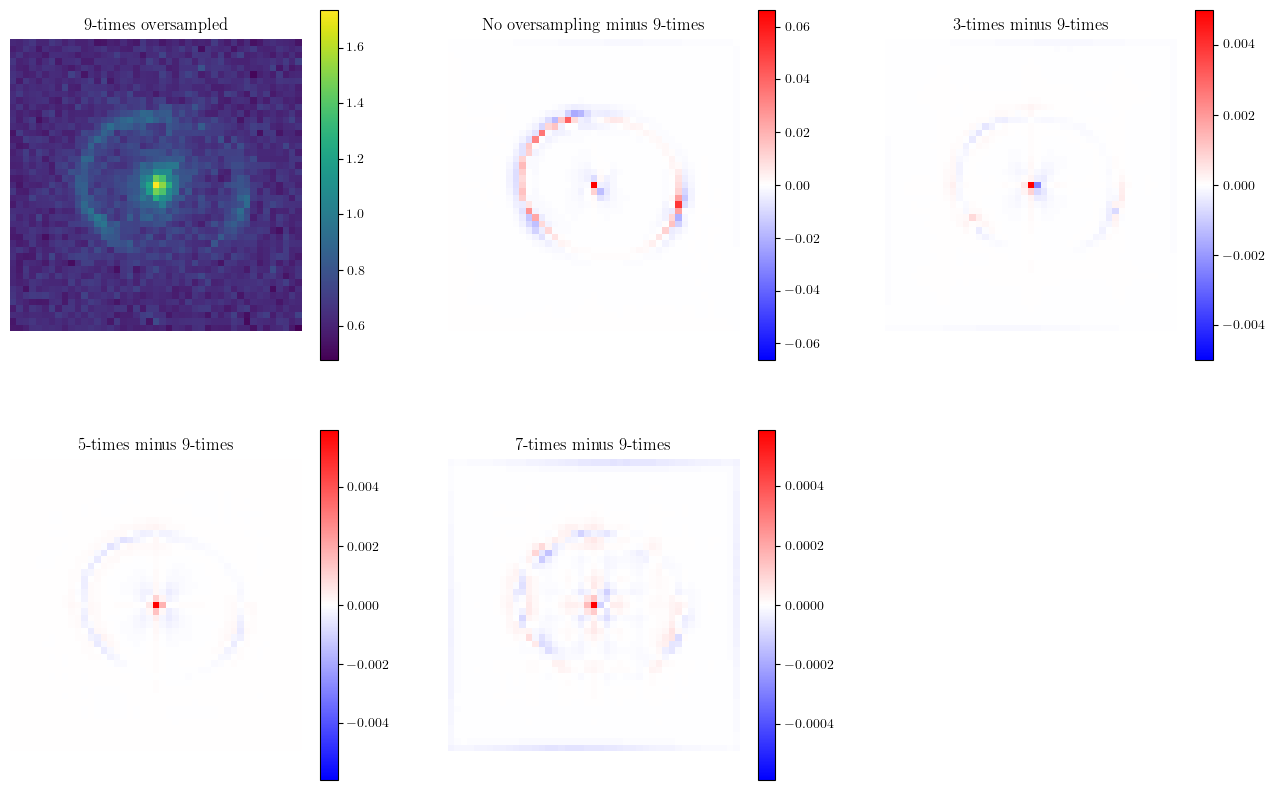

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

def get_limit(array):
    abs_min, abs_max = abs(np.min(array)), abs(np.max(array))
    return np.max([abs_min, abs_max])

ax0 = ax[0,0].imshow(pandeia_9)
ax1 = ax[0,1].imshow(pandeia_1 - pandeia_9, cmap='bwr', vmin=-get_limit(pandeia_1 - pandeia_9), vmax=get_limit(pandeia_1 - pandeia_9))
ax2 = ax[0,2].imshow(pandeia_3 - pandeia_9, cmap='bwr', vmin=-get_limit(pandeia_3 - pandeia_9), vmax=get_limit(pandeia_3 - pandeia_9))
ax3 = ax[1,0].imshow(pandeia_5 - pandeia_9, cmap='bwr', vmin=-get_limit(pandeia_5 - pandeia_9), vmax=get_limit(pandeia_5 - pandeia_9))
ax4 = ax[1,1].imshow(pandeia_7 - pandeia_9, cmap='bwr', vmin=-get_limit(pandeia_7 - pandeia_9), vmax=get_limit(pandeia_7 - pandeia_9))

ax[0,0].set_title('9-times oversampled')
ax[0,1].set_title('No oversampling minus 9-times')
ax[0,2].set_title('3-times minus 9-times')
ax[1,0].set_title('5-times minus 9-times')
ax[1,1].set_title('7-times minus 9-times')

ax[0,0].set_axis_off()
ax[0,1].set_axis_off()
ax[0,2].set_axis_off()
ax[1,0].set_axis_off()
ax[1,1].set_axis_off()

plt.colorbar(ax0, ax=ax[0,0])
plt.colorbar(ax1, ax=ax[0,1])
plt.colorbar(ax2, ax=ax[0,2])
plt.colorbar(ax3, ax=ax[1,0])
plt.colorbar(ax4, ax=ax[1,1])

ax[1,2].remove()

plt.show()